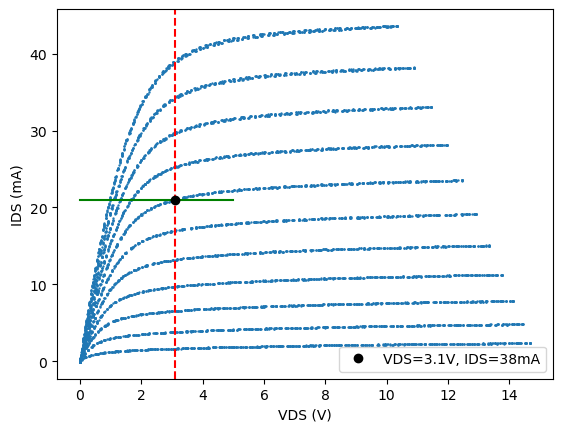

In [8]:
#Plot data in part1.csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('curveTrace.csv', skiprows=28, encoding='latin-1')

plt.scatter(df['Channel 1 (V)'], df['Math 1 (A)'] * 1000, s=.5)
plt.xlabel('VDS (V)')
plt.ylabel('IDS (mA)')

#Plot x=3.1
plt.axvline(x=3.1, color='r', linestyle='--')

x = np.linspace(0, 5, 100)
y = np.linspace(21, 21, 100)
plt.plot(x, y, '-g')

plt.plot(3.1, 21, 'ko', label='VDS=3.1V, IDS=38mA')
#Label the point
plt.legend()

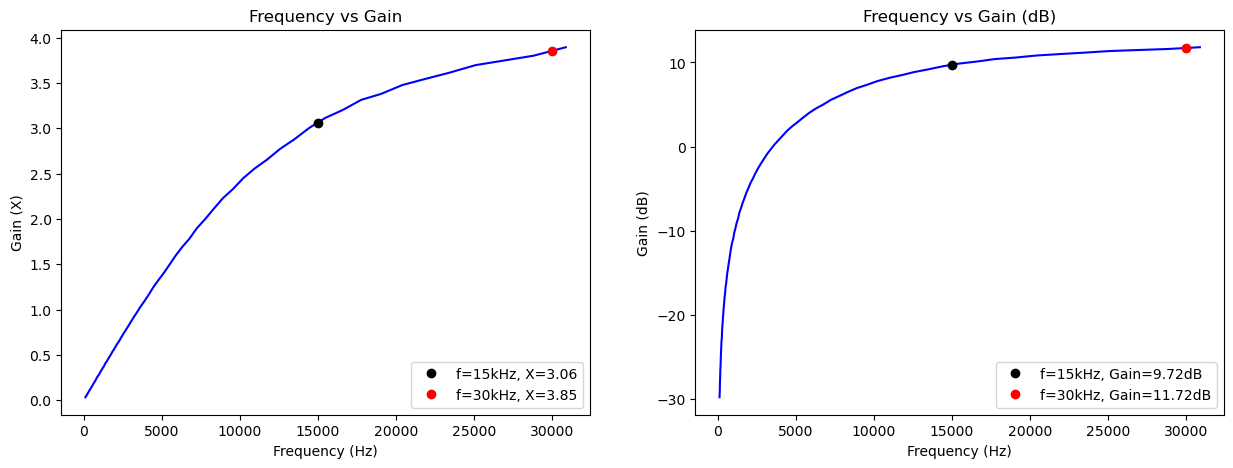

In [36]:
import numpy as np
FREQ = 15000

df = pd.read_csv('gainFirst.csv', skiprows=20, encoding='latin-1')

#Plot Frequency vs Channel 2 Magnitude (X) up until 100kHz
df = df[df['Frequency (Hz)'] <= 31000]
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(df['Frequency (Hz)'], df['Channel 2 Magnitude (X)'], '-b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (X)')
plt.title('Frequency vs Gain')
#Estimate the value of y at x=15000 on the graph
y = np.interp(FREQ, df['Frequency (Hz)'], df['Channel 2 Magnitude (X)'])
plt.plot(FREQ, y, 'ko', label=f'f=15kHz, X={round(y, 2)}')

#Estimate the value of y at x=30000 on the graph
y = np.interp(30000, df['Frequency (Hz)'], df['Channel 2 Magnitude (X)'])
plt.plot(30000, y, 'ro', label=f'f=30kHz, X={round(y, 2)}')
#Legend at bottom right
plt.legend(loc='lower right')

#Plot Frequency vs Channel 2 Magnitude (X) up until 100kHz but in dB
plt.subplot(1, 2, 2)
gain = 20 * np.log10(df['Channel 2 Magnitude (X)'])
plt.plot(df['Frequency (Hz)'], gain, '-b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Frequency vs Gain (dB)')
#Estimate the value of y at x=15000 on the graph
y = np.interp(FREQ, df['Frequency (Hz)'], gain)
plt.plot(FREQ, y, 'ko', label=f'f=15kHz, Gain={round(y, 2)}dB')

#Estimate the value of y at x=30000 on the graph
y = np.interp(30000, df['Frequency (Hz)'], gain)
plt.plot(30000, y, 'ro', label=f'f=30kHz, Gain={round(y, 2)}dB')
plt.legend(loc='lower right')


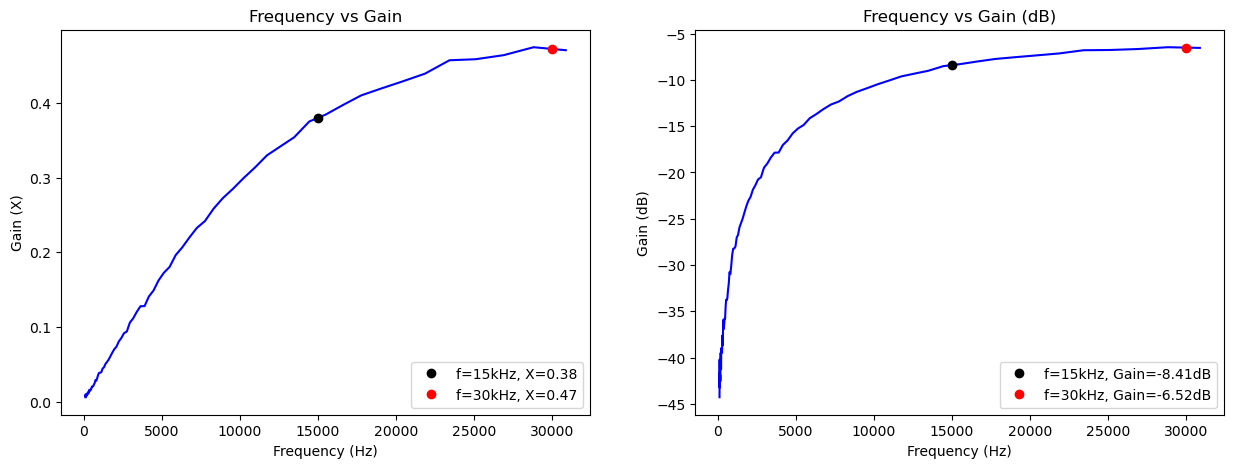

In [37]:
import numpy as np
FREQ = 15000

df = pd.read_csv('gainSecond.csv', skiprows=20, encoding='latin-1')

#Plot Frequency vs Channel 2 Magnitude (X) up until 100kHz
df = df[df['Frequency (Hz)'] <= 31000]

#undo the dB conversion
gain = 10 ** (df['Channel 2 Magnitude (dB)'] / 20)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(df['Frequency (Hz)'], gain, '-b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (X)')
plt.title('Frequency vs Gain')
#Estimate the value of y at x=15000 on the graph
y = np.interp(FREQ, df['Frequency (Hz)'], gain)
plt.plot(FREQ, y, 'ko', label=f'f=15kHz, X={round(y, 2)}')

#Estimate the value of y at x=30000 on the graph
y = np.interp(30000, df['Frequency (Hz)'], gain)
plt.plot(30000, y, 'ro', label=f'f=30kHz, X={round(y, 2)}')
#Legend at bottom right
plt.legend(loc='lower right')

#Plot Frequency vs Channel 2 Magnitude (X) up until 100kHz but in dB
plt.subplot(1, 2, 2)
gain = df['Channel 2 Magnitude (dB)']
plt.plot(df['Frequency (Hz)'], gain, '-b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Frequency vs Gain (dB)')
#Estimate the value of y at x=15000 on the graph
y = np.interp(FREQ, df['Frequency (Hz)'], gain)
plt.plot(FREQ, y, 'ko', label=f'f=15kHz, Gain={round(y, 2)}dB')

#Estimate the value of y at x=30000 on the graph
y = np.interp(30000, df['Frequency (Hz)'], gain)
plt.plot(30000, y, 'ro', label=f'f=30kHz, Gain={round(y, 2)}dB')
plt.legend(loc='lower right')

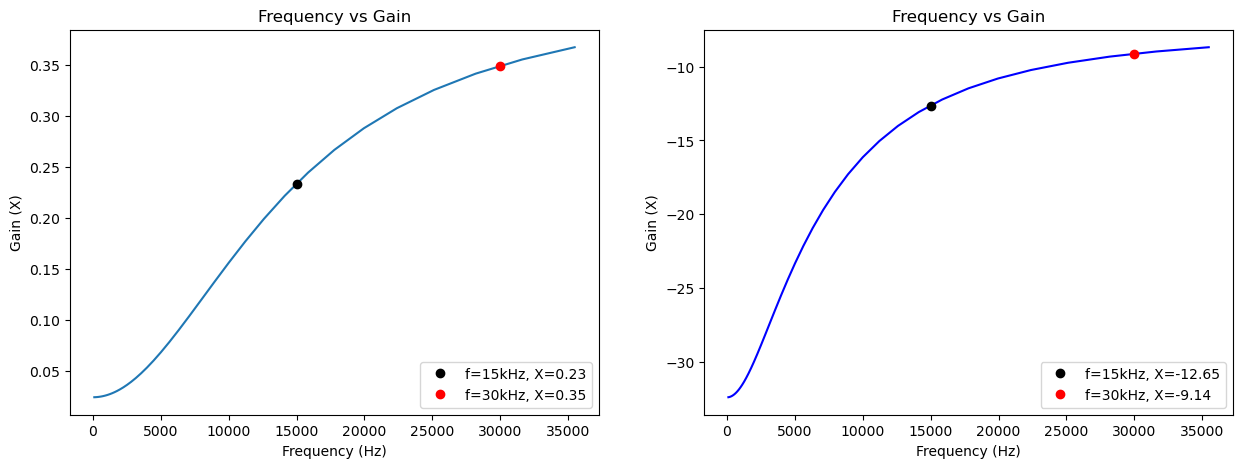

In [59]:
import numpy as np

FREQ = 15000

df = pd.read_csv('drain.csv', encoding='latin-1')

#Plot Frequency vs Channel 2 Magnitude (X) up until 100kHz
x_label = 'Frequency'
y_label = 'V(C2:1)'

df = df[df[x_label ] <= 36000]
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(df[x_label ], df[y_label] * 10 + 0.024)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (X)')
plt.title('Frequency vs Gain')
#Estimate the value of y at x=15000 on the graph
y = np.interp(FREQ, df[x_label], df[y_label] * 10 + 0.024)
plt.plot(FREQ, y, 'ko', label=f'f=15kHz, X={round(y, 2)}')


#Estimate the value of y at x=30000 on the graph
y = np.interp(30000, df[x_label], df[y_label] * 10 +.024)
plt.plot(30000, y, 'ro', label=f'f=30kHz, X={round(y, 2)}')
#Legend at bottom right
plt.legend(loc='lower right')

# #Plot Frequency vs Channel 2 Magnitude (X) up until 100kHz but in dB
# plt.subplot(1, 2, 2)
gain = 20 * np.log10(df[y_label] * 10 + 0.024)
plt.subplot(1, 2, 2)
plt.plot(df[x_label ], gain, '-b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (X)')
plt.title('Frequency vs Gain')
#Estimate the value of y at x=15000 on the graph
y = np.interp(FREQ, df[x_label], gain)
plt.plot(FREQ, y, 'ko', label=f'f=15kHz, X={round(y, 2)}')


#Estimate the value of y at x=30000 on the graph
y = np.interp(30000, df[x_label], gain)
plt.plot(30000, y, 'ro', label=f'f=30kHz, X={round(y, 2)}')
#Legend at bottom right
plt.legend(loc='lower right')
